<a href="https://colab.research.google.com/github/youngcheolman/youngcheol-Park/blob/main/%EC%99%80%EC%9D%B8_%ED%92%88%EC%A7%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##와인품질


In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
df = pd.read_csv("/content/drive/MyDrive/와인품질1.csv", encoding = "cp949")
df

,구분자,품질,산도,휘발성산,시트르산,잔당,염화물,독립 이산화황,총 이산화황,밀도,수소이온농도,황산염,도수,종류
0,1,5,8.8,0.61,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
1,2,5,7.9,0.21,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
2,3,6,7.0,0.21,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
3,4,6,7.8,0.40,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
4,5,6,6.0,0.19,0.37,9.7,0.032,17.0,50.0,0.99320,3.08,0.66,12.0,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,497,7,8.1,0.43,0.42,6.6,0.033,36.0,141.0,0.99180,2.98,0.39,13.3,white
497,498,7,6.5,0.30,0.32,2.0,0.044,34.0,90.0,0.99185,3.37,0.68,11.0,white
498,499,6,6.3,0.26,0.25,5.2,0.046,11.0,133.0,0.99202,2.97,0.68,11.0,white
499,500,6,6.4,0.16,0.28,2.2,0.042,33.0,93.0,0.99140,3.31,0.43,11.1,white


In [103]:
df.info

<bound method DataFrame.info of      구분자  품질   산도  휘발성산  시트르산   잔당    염화물  독립 이산화황  총 이산화황       밀도  수소이온농도  \
0      1   5  8.8  0.61  0.14  2.4  0.067     10.0    42.0  0.99690    3.19   
1      2   5  7.9  0.21  0.39  2.0  0.057     21.0   138.0  0.99176    3.05   
2      3   6  7.0  0.21  0.31  6.0  0.046     29.0   108.0  0.99390    3.26   
3      4   6  7.8  0.40  0.26  9.5  0.059     32.0   178.0  0.99550    3.04   
4      5   6  6.0  0.19  0.37  9.7  0.032     17.0    50.0  0.99320    3.08   
..   ...  ..  ...   ...   ...  ...    ...      ...     ...      ...     ...   
496  497   7  8.1  0.43  0.42  6.6  0.033     36.0   141.0  0.99180    2.98   
497  498   7  6.5  0.30  0.32  2.0  0.044     34.0    90.0  0.99185    3.37   
498  499   6  6.3  0.26  0.25  5.2  0.046     11.0   133.0  0.99202    2.97   
499  500   6  6.4  0.16  0.28  2.2  0.042     33.0    93.0  0.99140    3.31   
500  501   5  8.4  0.56  0.08  2.1  0.105     16.0    44.0  0.99580    3.13   

      황산염    도수    

In [104]:
df.isnull().sum()

구분자        0
품질         0
산도         0
휘발성산       0
시트르산       0
잔당         0
염화물        0
독립 이산화황    0
총 이산화황     0
밀도         0
수소이온농도     0
황산염        0
도수         0
종류         0
dtype: int64

##분류모형 - 그리드 서치

In [105]:
#필요한(변수, feature) 열만 뽑아서 데이터 만듬

X = df[["황산염","휘발성산","잔당","염화물","도수","산도", "품질"]]
Y = df["종류"]  

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#모형생성
model = KNeighborsClassifier()

#검증(Stratified K-fold Cross-Validation test)
skf = StratifiedKFold(n_splits = 9, shuffle = True, random_state = 0)
scores = cross_val_score(model, X_train, Y_train, cv = skf)
print("교차검증 점수 :", scores)

교차검증 점수 : [0.87179487 0.79487179 0.94871795 0.8974359  0.84615385 0.84615385
 0.84615385 0.92307692 0.89473684]


In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
X = df[["황산염","휘발성산","잔당","염화물","도수","산도", "품질"]]
Y = df["종류"]  

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#모형생성
model = KNeighborsClassifier()

#그리드 인자 검색
mylist = list(range(1,50))
k_list = [x for x in mylist if x %2 !=0]  # ! = 0은 홀수 , ! = 1은 짝수
parameter_grid = {"n_neighbors" : k_list}

#그리드 서치 - 모델에 가장 적합한 하이퍼 파라미터를 찾아주는 것
grid_search = GridSearchCV(model, parameter_grid, cv = 10)
grid_search.fit(X_train, Y_train)

grid_search.best_params_

{'n_neighbors': 25}

In [108]:
#그리드 서치
grid_search = GridSearchCV(model, parameter_grid, cv = 25)
grid_search.fit(X_train, Y_train)

grid_search.best_params_
grid_search.cv_results_

{'mean_fit_time': array([0.00283052, 0.00263173, 0.00242721, 0.00263208, 0.00243591,
        0.00267682, 0.00267216, 0.00239131, 0.00335485, 0.00274072,
        0.00251936, 0.00238617, 0.00272274, 0.00228139, 0.0023803 ,
        0.0023066 , 0.00285904, 0.00231174, 0.00265791, 0.00237021,
        0.0028165 , 0.00371151, 0.00420845, 0.00370584, 0.00363986]),
 'std_fit_time': array([0.00087109, 0.00057465, 0.00034908, 0.00055753, 0.0004987 ,
        0.00064601, 0.00054987, 0.00032684, 0.00150524, 0.0005824 ,
        0.00052629, 0.00015222, 0.00088915, 0.00012974, 0.00021834,
        0.00011975, 0.0005062 , 0.00030366, 0.000937  , 0.00036504,
        0.0008521 , 0.00044247, 0.00120745, 0.00060552, 0.00048212]),
 'mean_score_time': array([0.00294406, 0.00296326, 0.00260194, 0.00268313, 0.00265008,
        0.00282756, 0.00292238, 0.00264442, 0.00333695, 0.00293385,
        0.00270108, 0.00259815, 0.0030922 , 0.00251481, 0.00257915,
        0.00257888, 0.00343451, 0.00257829, 0.00276848, 0.00

In [109]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=17)

In [110]:
from sklearn.metrics import accuracy_score
be = grid_search.best_estimator_
pred = be.predict(X_test)
accuracy_score(Y_test, pred)

0.8741721854304636

##회귀모형 - 전처리

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE

In [112]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf     

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [113]:
import matplotlib.pyplot as plt
plt.rc('font',family='NanumbarunGothic')

In [114]:
!pip install pingouin
!pip install scikit_posthocs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [115]:
from matplotlib import pyplot as plt
from pandas import DataFrame
import numpy as np
import pandas as pd
import math
import sklearn.preprocessing 
from scipy import stats
import pingouin as pg
import scikit_posthocs
import scipy as sp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.model_selection import train_test_split

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   구분자      501 non-null    int64  
 1   품질       501 non-null    int64  
 2   산도       501 non-null    float64
 3   휘발성산     501 non-null    float64
 4   시트르산     501 non-null    float64
 5   잔당       501 non-null    float64
 6   염화물      501 non-null    float64
 7   독립 이산화황  501 non-null    float64
 8   총 이산화황   501 non-null    float64
 9   밀도       501 non-null    float64
 10  수소이온농도   501 non-null    float64
 11  황산염      501 non-null    float64
 12  도수       501 non-null    float64
 13  종류       501 non-null    object 
dtypes: float64(11), int64(2), object(1)
memory usage: 54.9+ KB


In [117]:
df.isnull().sum()

구분자        0
품질         0
산도         0
휘발성산       0
시트르산       0
잔당         0
염화물        0
독립 이산화황    0
총 이산화황     0
밀도         0
수소이온농도     0
황산염        0
도수         0
종류         0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='산도', ylabel='Density'>

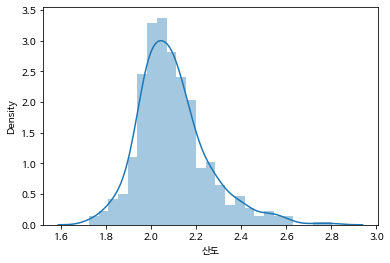

In [118]:
import seaborn as sns
import numpy as np

df["산도"]= np.log1p(df["산도"])
sns.distplot(df["산도"])

BP(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7fb48bac9a90>, <matplotlib.lines.Line2D object at 0x7fb48bac9d60>], 'caps': [<matplotlib.lines.Line2D object at 0x7fb48bad4070>, <matplotlib.lines.Line2D object at 0x7fb48bad4340>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fb48bac98e0>], 'medians': [<matplotlib.lines.Line2D object at 0x7fb48bad4610>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fb48bad48e0>], 'means': []})

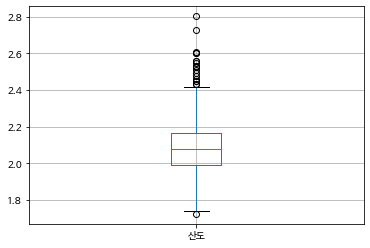

In [119]:
df.boxplot(column = "산도", return_type="both")

In [120]:
q1 = df["산도"].quantile(q=0.25)
q3 = df["산도"].quantile(q=0.75)
IQR = q3-q1
IQR

0.17544867750619275

In [121]:
data_IQR = df[(df["산도"]< q3 + IQR * 1.5) & (df["산도"]> q1 - IQR*1.5)]
data_IQR

,구분자,품질,산도,휘발성산,시트르산,잔당,염화물,독립 이산화황,총 이산화황,밀도,수소이온농도,황산염,도수,종류
0,1,5,2.282382,0.61,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
1,2,5,2.186051,0.21,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
2,3,6,2.079442,0.21,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
3,4,6,2.174752,0.40,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
4,5,6,1.945910,0.19,0.37,9.7,0.032,17.0,50.0,0.99320,3.08,0.66,12.0,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,497,7,2.208274,0.43,0.42,6.6,0.033,36.0,141.0,0.99180,2.98,0.39,13.3,white
497,498,7,2.014903,0.30,0.32,2.0,0.044,34.0,90.0,0.99185,3.37,0.68,11.0,white
498,499,6,1.987874,0.26,0.25,5.2,0.046,11.0,133.0,0.99202,2.97,0.68,11.0,white
499,500,6,2.001480,0.16,0.28,2.2,0.042,33.0,93.0,0.99140,3.31,0.43,11.1,white


<ipython-input-122-700246624977>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_IQR["산도"]= np.log1p(data_IQR["산도"])
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes

<AxesSubplot:xlabel='산도', ylabel='Density'>

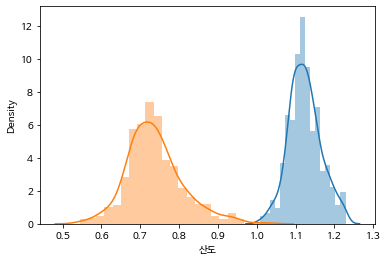

In [122]:
data_IQR["산도"]= np.log1p(data_IQR["산도"])
sns.distplot(data_IQR["산도"])

df["산도"]= np.log(df["산도"])
sns.distplot(df["산도"]) 
#주황색 : IQR 적용 전 / 파랑색 : IQR 적용 후 

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num=["황산염","휘발성산","잔당","염화물"]
cg=["종류"]

X = df[num+cg]
Y = df["산도"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

ct = ColumnTransformer([('scling', StandardScaler(), num), ('onehot', OneHotEncoder(sparse = False), cg)])
ct.fit(X_train,Y_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

print(X_train[0])

[-0.10894479 -0.48906965 -0.76241967 -0.47681014  0.          1.        ]


##선형회귀

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
lr = LinearRegression().fit(X_train, Y_train) #선형회귀

Y_pred = lr.predict(X_test)
print("predict value\n", Y_pred)
print("train R2 : {:.3f}".format(lr.score(X_train, Y_train)))
print("test R2 : {:.3f}".format(lr.score(X_test, Y_test)))

rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE: {:.3f}".format(rmse))

predict value
 [0.70999975 0.82524431 0.70138556 0.73908377 0.70021768 0.83194178
 0.71253639 0.81545606 0.7168082  0.70030006 0.70057145 0.70237335
 0.71295394 0.7955358  0.75477206 0.73964625 0.71298536 0.81065222
 0.70354097 0.71868524 0.77770716 0.70121383 0.72674805 0.70354412
 0.73691093 0.71418666 0.71819633 0.7245506  0.70372449 0.71556884
 0.70751267 0.70970956 0.77092895 0.70994945 0.70405141 0.70396207
 0.69102094 0.75311258 0.70383109 0.71874666 0.71985165 0.70208445
 0.81618731 0.67517902 0.68620897 0.71296462 0.78708211 0.70984302
 0.71973563 0.71158111 0.81344108 0.7442728  0.71225794 0.72790504
 0.72219439 0.69425018 0.72113716 0.73832438 0.80940087 0.7853414
 0.71366817 0.73834645 0.72310354 0.80862923 0.72070392 0.70833288
 0.71277357 0.71791821 0.71403353 0.74009299 0.70369241 0.71372395
 0.71404022 0.71252151 0.72502862 0.80906151 0.68352797 0.69567756
 0.76904616 0.69938882 0.72068868 0.82781166 0.69163733 0.72269445
 0.70952934 0.70432709 0.79122383 0.71639216 0.7

In [125]:
print("절편", np.round(lr.intercept_, 3))
print("가중치(beta)", np.round(lr.coef_, 3))

절편 0.762
가중치(beta) [ 0.006 -0.015  0.01   0.007  0.052 -0.052]


##K-NN (K-최근접 이웃)

In [126]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

ct = ColumnTransformer([('scling', StandardScaler(), num), ('onehot', OneHotEncoder(sparse = False), cg)])
ct.fit(X_train,Y_train)
X_test = ct.transform(X_test)
X_train = ct.transform(X_train)

from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors = 9, p=2)
#p : int, default=2
#power parameter for the minkowski metric. when p =1
#this is equivalent to using manhattan_distance(l1), and euclidean_distance(l2) for p=2, For arbitary p,minkowski distance
# 1은 맨하탄 2는 유클리디안 

knn_reg.fit(X_train,Y_train)
Y_pred = knn_reg.predict(X_test)
print("accuracy: {:.3f}".format(knn_reg.score(X_train,Y_train)))
rmse = sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE {:.3f}".format(rmse))

accuracy: 0.431
RMSE 0.061


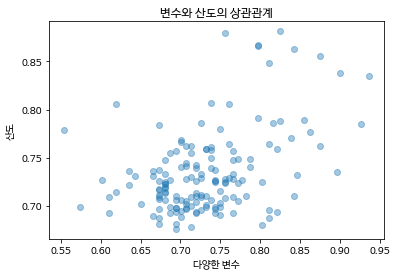

In [127]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,Y_pred, alpha=0.4)
plt.xlabel("다양한 변수")
plt.ylabel("산도")
plt.title("변수와 산도의 상관관계")
plt.show()

## 의사결정나무


In [128]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

#표준화,원핫인코딩
ct = ColumnTransformer([('scling', StandardScaler(),num),('onehot',OneHotEncoder(sparse = False), cg)])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

#numeric values(Y)
DT_model_reg = DecisionTreeRegressor(random_state = 0, max_depth = 5) #depth 가장 적절히 찾아서 분류
DT_model_reg.fit(X_train, Y_train)
Y_pred = DT_model_reg.predict(X_test)
print("accuracy : {:.3f}".format(DT_model_reg.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("rmse : {:.3f}".format(rmse))

accuracy : 0.615
rmse : 0.073


In [129]:
feature_name = ['종류1','종류2','황산염', '휘발성산', '잔당', '염화물']
#방개수 1,2,3,4,5,6,8  / 집 종류 4가지 여서 데이터 각각 넣음
num=["황산염","휘발성산","잔당","염화물"]
cg=["종류"]
feature_importance = DT_model_reg.feature_importances_  #어느 모델에 넣어도 나옴(회귀 빼고)
sorted(zip(feature_importance, feature_name), reverse = True)  #변수의 중요도/ 높을수록 중요(0은 상관없다는 뜻)

[(0.44045240419893705, '염화물'),
 (0.23652613056427826, '종류1'),
 (0.1623160815740696, '황산염'),
 (0.11396022412144143, '종류2'),
 (0.046745159541273645, '휘발성산'),
 (0.0, '잔당')]

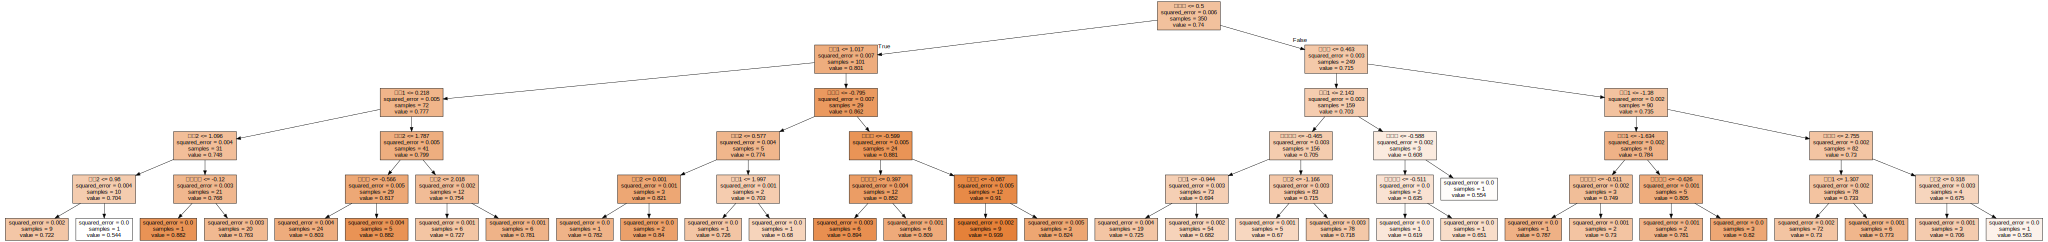

In [130]:
from sklearn.tree import export_graphviz
import graphviz

#파일생성
export_graphviz(DT_model_reg, out_file = "tree.dot", feature_names = feature_name, impurity = True, filled = True)

#파일열기
with open("tree.dot", encoding = "utf-8") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)